## Customer Churn Prediction – Classical ML Models



## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Importing the dataset

In [39]:
df = pd.read_excel("Telco_customer_churn.xlsx")
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (7043, 33)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## Exploring the Dataset


In [40]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [41]:
df.describe()


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [42]:
df.isnull().sum()


,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [43]:
df.drop(["Count","Country","State","Churn Label","Churn Score","Churn Reason","CustomerID","Lat Long","Latitude","Longitude"], axis=1, inplace=True)

In [44]:
df['Multiple Lines'] = df['Multiple Lines'].replace('No phone service', 'No')
df['Online Security'] = df['Online Security'].replace('No internet service', 'No')
df['Online Backup'] = df['Online Backup'].replace('No internet service', 'No')
df['Device Protection'] = df['Device Protection'].replace('No internet service', 'No')
df['Tech Support'] = df['Tech Support'].replace('No internet service', 'No')
df['Tech Support'] = df['Tech Support'].replace('No internet service', 'No')
df['Streaming TV'] = df['Streaming TV'].replace('No internet service', 'No')
df['Streaming Movies'] = df['Streaming Movies'].replace('No internet service', 'No')

#Note:


In [45]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


## Encoding categorical data

# Encoding the independant variable

In [46]:
from sklearn.preprocessing import LabelEncoder

binary_cols = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
    'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection',
    'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing'
]

le = LabelEncoder()

for col in binary_cols:
    if df[col].nunique() == 2:
        df[col] = le.fit_transform(df[col])


In [47]:
#Converting the type of the column "Total Charges" from Objet(string) to Float
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [48]:
df = df.dropna(subset=['Total Charges'])


In [49]:
print(df['Total Charges'])

0        108.15
1        151.65
2        820.50
3       3046.05
4       5036.30
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: Total Charges, Length: 7032, dtype: float64


In [50]:
print(df.columns)
df_for_feature_importance = df.copy()

Index(['City', 'Zip Code', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'CLTV'],
      dtype='object')


In [15]:
#  One-Hot Encoding for Multiclass Categorical Variables
multi_class_cols = ['City', 'Contract', 'Payment Method','Internet Service']

df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)  # drop_first pour éviter la multicolinéarité

In [16]:
#  Séparation des variables indépendantes (X) et de la variable cible (y)
df2 = df.drop(columns=['Churn Value'])

X=df2
y = df['Churn Value']

In [17]:
print(X)


      Zip Code  Gender  Senior Citizen  Partner  Dependents  Tenure Months  \
0        90003       1               0        0           0              2   
1        90005       0               0        0           1              2   
2        90006       0               0        0           1              8   
3        90010       0               0        1           1             28   
4        90015       1               0        0           1             49   
...        ...     ...             ...      ...         ...            ...   
7038     92285       0               0        0           0             72   
7039     92301       1               0        1           1             24   
7040     92304       0               0        1           1             72   
7041     92305       0               0        1           1             11   
7042     92308       1               0        0           0             66   

      Phone Service  Multiple Lines  Online Security  Online Ba

In [18]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Value, Length: 7032, dtype: int64


## Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

## Feature scaling


In [20]:
# Feature scaling uniquement sur les colonnes numériques
from sklearn.preprocessing import StandardScaler

numerical_cols =['Zip Code','Tenure Months','Monthly Charges','Total Charges','CLTV']

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


# Training the Model

## Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## XGBoost Classifier

In [22]:
from xgboost import XGBClassifier
classifier_XG = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
classifier_XG.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Making the confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred_RF = classifier_RF.predict(X_test)
y_pred_XG = classifier_XG.predict(X_test)



accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
accuracy_score_XG = accuracy_score(y_test, y_pred_XG)

print(accuracy_score_RF)
print(accuracy_score_XG)

0.8052594171997157
0.8116560056858564


## Building the Artificial Neuron Network(ANN)

In [24]:
import tensorflow as tf


In [25]:

ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

In [26]:
ann.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
#Train the model
ann.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7549 - loss: 0.4982 - val_accuracy: 0.8138 - val_loss: 0.3977
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8101 - loss: 0.4042 - val_accuracy: 0.8124 - val_loss: 0.3954
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8291 - loss: 0.3651 - val_accuracy: 0.8045 - val_loss: 0.3980
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8567 - loss: 0.3259 - val_accuracy: 0.8024 - val_loss: 0.4393
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8709 - loss: 0.2881 - val_accuracy: 0.7875 - val_loss: 0.4495
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8926 - loss: 0.2598 - val_accuracy: 0.7882 - val_loss: 0.4835
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9059 - loss: 0.2232 - val_accuracy: 0.7989 - val_loss: 0.5497
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9245 - loss: 0.1883 - val_accuracy: 0

#Note: Le modèle ayant le mieux performé est XGBoost

## Grid search pour trouver les parametres optimaux d'XGBOOST

In [27]:
"""
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# Grid Search
grid_search = GridSearchCV(estimator=classifier_XG,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

# Entraînement avec la grille
grid_search.fit(X_train, y_train)

# Meilleurs résultats
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
print("Best Parameters:", best_parameters)
"""

'\nfrom sklearn.model_selection import GridSearchCV\n\nparameters = {\n    \'n_estimators\': [50, 100, 150],\n    \'max_depth\': [3, 4, 5],\n    \'learning_rate\': [0.01, 0.05, 0.1],\n    \'subsample\': [0.8, 1.0]\n}\n\n# Grid Search\ngrid_search = GridSearchCV(estimator=classifier_XG,\n                           param_grid=parameters,\n                           scoring=\'accuracy\',\n                           cv=5,\n                           n_jobs=-1)\n\n# Entraînement avec la grille\ngrid_search.fit(X_train, y_train)\n\n# Meilleurs résultats\nbest_accuracy = grid_search.best_score_\nbest_parameters = grid_search.best_params_\n\nprint("Best Accuracy: {:.2f} %".format(best_accuracy * 100))\nprint("Best Parameters:", best_parameters)\n'

In [28]:
best_xgb_model = XGBClassifier(learning_rate=0.05,max_depth=4,n_estimators=150,subsample=0.8, eval_metric='logloss', random_state=42)
best_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [29]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = best_xgb_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.44 %
Standard Deviation: 1.43 %


 Precision Score: 0.6656716417910448
 Recall Score: 0.6229050279329609
 F1 Score: 0.6435786435786436
 ROC-AUC Score: 0.8707947446623812


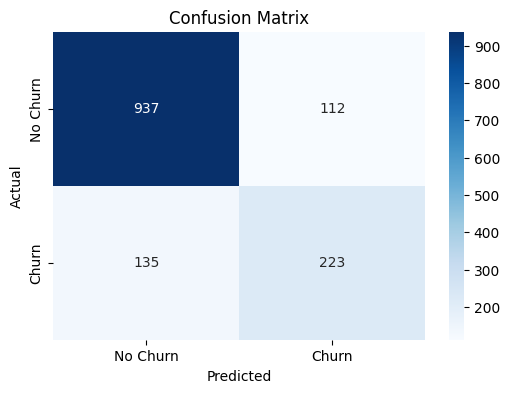

In [30]:
from sklearn.metrics import  confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score

y_pred = best_xgb_model.predict(X_test)
y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]  # pour ROC-AUC

# Évaluation complète
print(" Precision Score:", precision_score(y_test, y_pred))
print(" Recall Score:", recall_score(y_test, y_pred))
print(" F1 Score:", f1_score(y_test, y_pred))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Effectuer une single prediction

In [34]:
single_input = pd.DataFrame([{
    'City': 'Los Angeles',
    'Zip Code': 90007,
    'Gender': 1,
    'Senior Citizen': 0,
    'Partner': 0,
    'Dependents': 1,
    'Tenure Months': 22,
    'Phone Service': 1,
    'Multiple Lines': 1,
    'Internet Service': 'Fiber optic',
    'Online Security': 0,
    'Online Backup': 1,
    'Device Protection': 0,
    'Tech Support': 0,
    'Streaming TV': 1,
    'Streaming Movies': 0,
    'Contract': 'Month-to-month',
    'Paperless Billing': 1,
    'Payment Method': 'Credit card (automatic)',
    'Monthly Charges': 89.1,
    'Total Charges': 1949.4,
    'CLTV': 4459
}])

#Appliquer get_dummies
single_input = pd.get_dummies(single_input)

single_input = single_input.reindex(columns=X_test.columns, fill_value=0)

#Scaling
single_input[numerical_cols] = scaler.transform(single_input[numerical_cols])



In [35]:
prediction = best_xgb_model.predict(single_input)
print("Predicted Churn:", prediction[0])


Predicted Churn: 0


## Feature importance Analysis

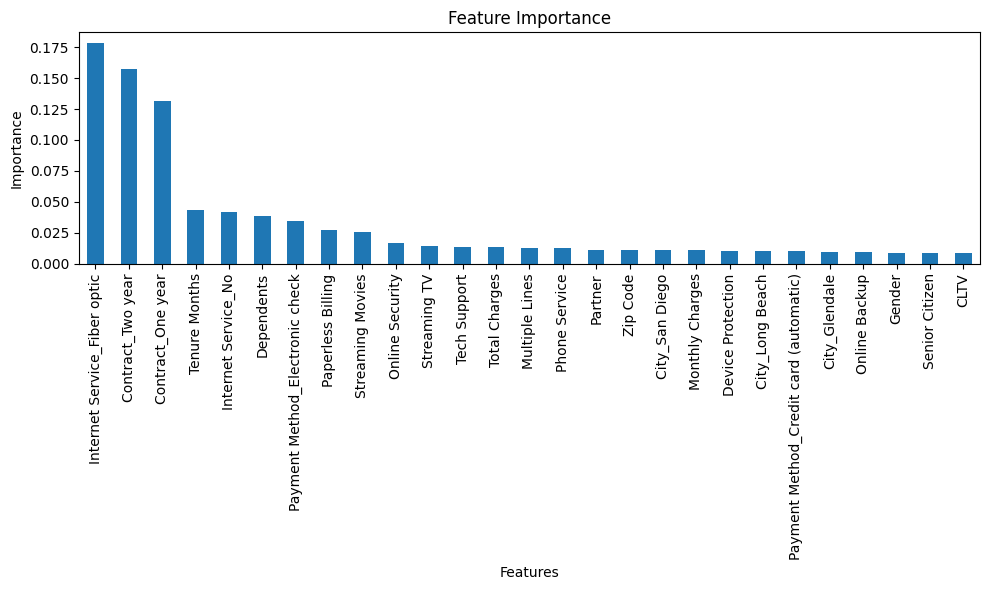

In [58]:

# Affichage des importances
importances = best_xgb_model.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

top_n = 27
feat_imp = feat_imp[:top_n]
# Plot
plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


##Notes:
Internet Service_Fiber optic est la variable la plus influente :les clients ayant la fibre optique ont un comportement significatif vis-à-vis du churn.                                       Contract_Two year & Contract_One year : les types de contrat jouent un rôle crucial : les contrats longue durée réduisent fortement le churn.
Tenure Months (ancienneté du client) : plus un client est ancien, moins il risque de partir.
Electronic Check (moyen de paiement) : les clients qui paient par chèque électronique ont plus de chances de churner.
Streaming / Tech Support / Paperless Billing : impact modéré mais présent.
City et CLTV (Customer Lifetime Value)  ont un impact marginal.

In [59]:
import joblib

joblib.dump(best_xgb_model, 'customer_churn_model.pkl')


['customer_churn_model.pkl']